# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

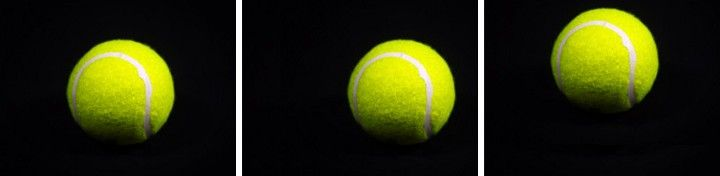



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [23]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image # python image library
from urllib.request import urlopen #Lets read an electronic address
from matplotlib import pyplot  #It Generates graphs according to your wishes.


First we upload an image from the internet

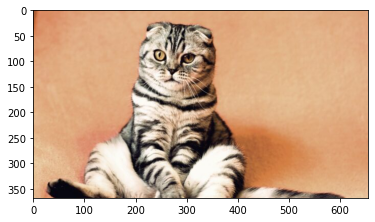

In [11]:
url = 'https://www.elindependiente.com/wp-content/uploads/2019/08/dia-gato-656x368.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


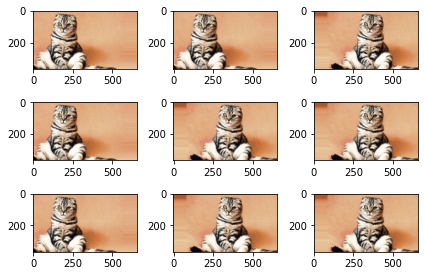

In [22]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover
datagen = ImageDataGenerator(width_shift_range=[-80,80])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') # is converted to a valid value so that it can be show as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The increase is specified by a Boolean argument **horizontal_flip** o **vertical_flip**   for the class **ImageDataGenerator**.

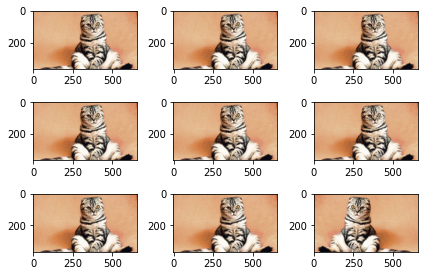

In [13]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

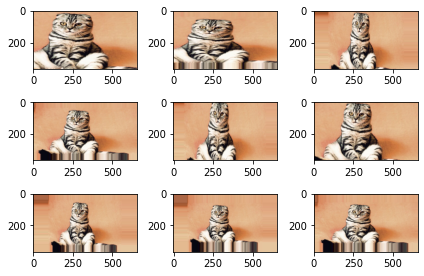

In [14]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

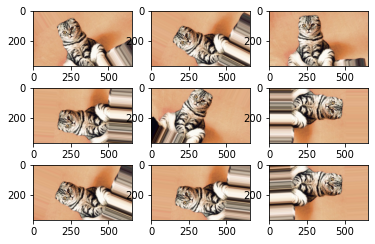

In [15]:
datagen = ImageDataGenerator(rotation_range=100)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many works a data augmentation is used to increase the amount of training images and improve the precision of the work.

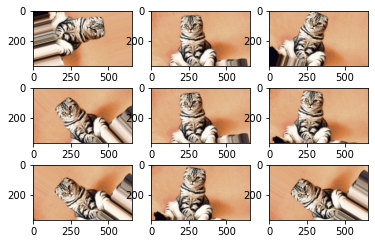

In [16]:
datagen = ImageDataGenerator(rotation_range=100)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**:Boolean, set the mean of each sample to zero
              featurewise_std_normalization:Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on characteristics.
              samplewise_std_normalization:Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening:Boolean, indicates if ZCA bleaching is applied.

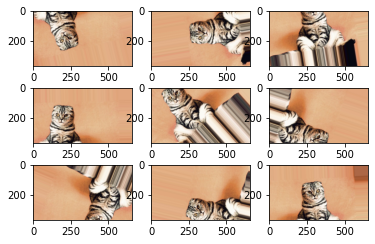

In [17]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [80,80],   
            height_shift_range           = [95,95],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

Information taken in 
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

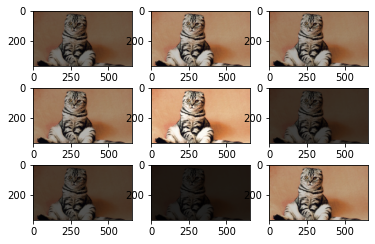

In [21]:
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.1,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

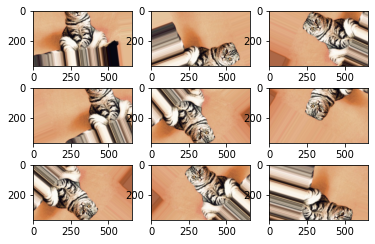

In [18]:
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that can help us to carry out this task, we will start by analyzing the following:

1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [1]:
!pip install textattack

     |████████████████████████████████| 327kB 6.3MB/s 
     |████████████████████████████████| 686kB 12.5MB/s 
     |████████████████████████████████| 245kB 24.6MB/s 
     |████████████████████████████████| 1.7MB 14.4MB/s 
     |████████████████████████████████| 317kB 31.8MB/s 
     |████████████████████████████████| 235kB 24.7MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 778kB 30.1MB/s 
     |████████████████████████████████| 3.0MB 34.6MB/s 
     |████████████████████████████████| 1.1MB 39.9MB/s 
     |████████████████████████████████| 153kB 61.0MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 204kB 57.5MB/s 
     |████████████████████████████████| 983kB 52.2MB/s 
     |████████████████████████████████| 798kB 55.0MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
     |████████████████████████████████| 276kB 39.8MB/

In [2]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 23:49:22 INFO: Downloading default packages for language: en (English)...
2020-10-16 23:56:08 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [3]:
text = "If you ever go, all the songs that we like, Will sound like bittersweet lullabies"

###TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [4]:
aug = WordNetAugmenter();
aug.augment(text)

['If you ever go, all the call that we like, Will sound like bittersweet lullabies']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [5]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:19<00:00, 25.2MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpnzoqzfoj.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['If you ever go, all the songs that we like, Will sounds like bittersweet lullabies']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [6]:
aug = CharSwapAugmenter()
aug.augment(text)

['If you ever go, all the songs that we like, Wlil sound like bittersweet lullabies']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [7]:
aug = EasyDataAugmenter()
aug.augment(text)

['If you ever go, all the songs that we like, Will heavy like bittersweet lullabies',
 'If you ever go, all the songs that like, Will sound like bittersweet lullabies',
 'If you ever go, all the songs that we like, Will Adam sound like bittersweet lullabies',
 'If you ever go, all the we that songs like, Will sound like bittersweet lullabies']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Supported languages ​​can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. Try and failure.


some examples of languages

* Afrikaans 'af'

*  Chinese (simplified)	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'

*   Latin	'la'


*   Spanish	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulu	'zu'



In [8]:
!pip install googletrans

     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 972kB 13.4MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=de0f0e20de376e74dff7159ce066ff6bd6c3ff57e054140b075b2fd4ad2f3e60
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=47829bb206ef9dcacf68a76caa2edf2a78654ea368bdd5a6d4787a853987b4ee
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [9]:
from googletrans import Translator
translator = Translator()

origin_text = "Look at the sky, is it a bird ?, is it a plane?"
text_trans = translator.translate(text=origin_text, dest='ja').text
text_trans = translator.translate(text=origin_text, dest='ko').text
text_trans = translator.translate(text=origin_text, dest='id').text
text_trans = translator.translate(text=origin_text, dest='es').text

final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(text_trans)
print(final)

In [10]:
origin_text = "Look up in the sky, it's a bird?, it's a plane?"
text_trans = translator.translate(text=origin_text, dest='ko').text
final=translator.translate(text=text_trans, dest='es').text

print(origin_text)
print(text_trans)
print(final)

Look up in the sky, it's a bird?, it's a plane?
하늘을 올려봐, 새야? 비행기 야?
Mira hacia el cielo, ¿es un pájaro? Es un avion?


In [11]:
origin_text = "笑ってよ 悲しいなら吹きとばそうよ, 笑えたら変わる景色 晴れ間がのぞく."
text_trans = translator.translate(text=origin_text, dest='en').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

笑ってよ 悲しいなら吹きとばそうよ, 笑えたら変わる景色 晴れ間がのぞく.
Laugh, if you're sad, blow it away, if you can laugh, the scenery will change.
Ríase, si está triste, déjelo volar, si puede reír, el escenario cambiará.


In [12]:
origin_text = "Dans mon esprit tout divague, Je me perds dans tes yeux, Je me noie dans la vague de ton regard amoureux "
text_trans = translator.translate(text=origin_text, dest='en').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

Dans mon esprit tout divague, Je me perds dans tes yeux, Je me noie dans la vague de ton regard amoureux 
In my mind everything wanders, I get lost in your eyes, I drown in the wave of your loving gaze
En mi mente todo vaga, me pierdo en tus ojos, me ahogo en la ola de tu mirada amorosa
